# Construindo núcleos de inflação 
---

* Construção de núcleos de inflação utilizados pelo Banco Central do Brasil
* **Núcleos de Exclusão**
     * IPCA-EX0/EX1/EX2/EX3
* **Núcleos estáticos**
     * IPCA-MA/MS/DP
* Alguns ítens do IPCA possuem variação mais voláteis, assim o BC procura isolar algumas tendências inflacionárias criando medidas auxiliáres: os núcleos do IPCA.

## Índice de Preços ao Cpnsumidor - IPCA
* É utilizado pelo Banco Central para cumprir o regime de metas de inflação
* É construido do forma hierarquizada, sendo dividido em grupos, subgrupos, ítens e subítens.
* Atualmente são nove grupos: alimentação, transportes, habitação, artidos de residência, vestuário, saúde, educação e comunicação.

## Composição do índice
* Todos os meses o IBGE calcula avariação do preço decada subítem em relação ao mês anterior, de acordocom o seu peso no índicecheio.
* O peso de cada um dos grupos é definido de acordo com os gastos das famílias em diferentes bens e serviços, determinados pela Pesquisa de Orçamento Familiar (POF) do IBGE.
* O somatório do produto entre a variação mensal e o peso de todos os subítens resultará na variação mensal do índice cheio.

## Classificações
* Em algumas análises é interessante reunir os subítens do IPCA em determinadas classificações, diferente dos 9 grupos definidos pelo IBGE.
* Por exemplo, dentro do pindice existem preços que são regulados, chamados de preços monitorados ou administrados. Esses peços seguem uma lógica diferente dos preços de mercado, assim pode ser melhor isolar e modelá-los conforme sua dinâmica própria, ao ínves de construir um modelo com o índice cheio. 



* Exclusão
    * **IPCA-EX0** -> Exclui Alimentação no demonicílio e monitorados
    * **IPCA-EX1** -> Exclui cereais, leguminosas e oleaginosas, açúcares, hortaliças, frutas, carnes, pescados, aves, ovos, leites, óleos, sal e condimentos. Aparelhos eletrodomésticos, automóveis, etanos, fumo, serviços e monitorados.
    * **IPCA-EX2** -> Exclui cereais, farinhas, féculas e massas, açucares, verduras, hortaliças, carnes, pescados, aves, ovos, leite, óleos e gosduras, sal e condimentos. Eletrodomésticos, automóveis, etanos, fumo, serviços e monitorados.  
    * **IPCA-EX3** -> Exclui alimentação no domicílio, eletrodomésticos, automóveis, etanos, fumo, serviços e monitorados.
* Média Aparada
    * **IPCA-MA** -> Simétrica (20% em cada cauda) sem ítens suavisados.
    * **IPCA-MS** -> Simétrica (20% em cada cauda) com ítens suavisados. Combustíveis domésticos, energia elétrica, transporte público, combustíveis, serviços pessoais, fumo, cursos e comunicação.
* Dupla Ponderação
    * **IPCA-DP** -> Pesos baseados na volatilidade relativa (48 meses) e nos pesos originais do IPCA, reduzindo a importância dos componentes mais voláteis.

### Núcleo por média aparada (IPCA-MA)
* Exclui os ítens com variação mensal acima do percentil 80 ou abaixo do percentil 20, utilizando 60% da distribuição.

### Núcleo por média aparada com suavização (IPCA-MS)
* Exclui 20% da variação de preços de âmbas as caudas da distribuição mensal, após a suavização de componentes com variação infrequêntes e de grandes magnitudes.

### Núcleo de dupla ponderação (IPCA-DP)
* Ajusta os pesos originais de casa ítem de acordo com sua volatilidade relativa, reduzindo a importância de componentes mais voláteis.

### Pacotes

In [13]:
library(sidrar)
library(tidyverse)
library(lubridate)

### Inflação mensal e acumulada em 12 meses

In [27]:
ipca_indice = 
    '/t/1737/n1/all/v/2266/p/all/d/v2266%2013' %>%
    get_sidra(api=.) %>%
    mutate(date = ymd(paste0(`Mês (Código)`, '01'))) %>%
    select(date, Valor) %>%
    mutate(mensal = round((Valor/lag(Valor, 1)-1)*100,2),
           anual = round((Valor/lag(Valor, 12)-1)*100,2))

All others arguments are desconsidered when 'api' is informed



### Janela a partir de 2007

In [29]:
ipca_janela = ipca_indice %>%
    filter(date >= as.Date('2007-06-01'))

In [36]:
ipca_janela

date,Valor,mensal,anual
<date>,<dbl>,<dbl>,<dbl>
2007-06-01,2669.38,0.28,3.69
2007-07-01,2675.79,0.24,3.74
2007-08-01,2688.37,0.47,4.18
2007-09-01,2693.21,0.18,4.15
2007-10-01,2701.29,0.30,4.12
2007-11-01,2711.55,0.38,4.19
2007-12-01,2731.62,0.74,4.46
2008-01-01,2746.37,0.54,4.56
2008-02-01,2759.83,0.49,4.61


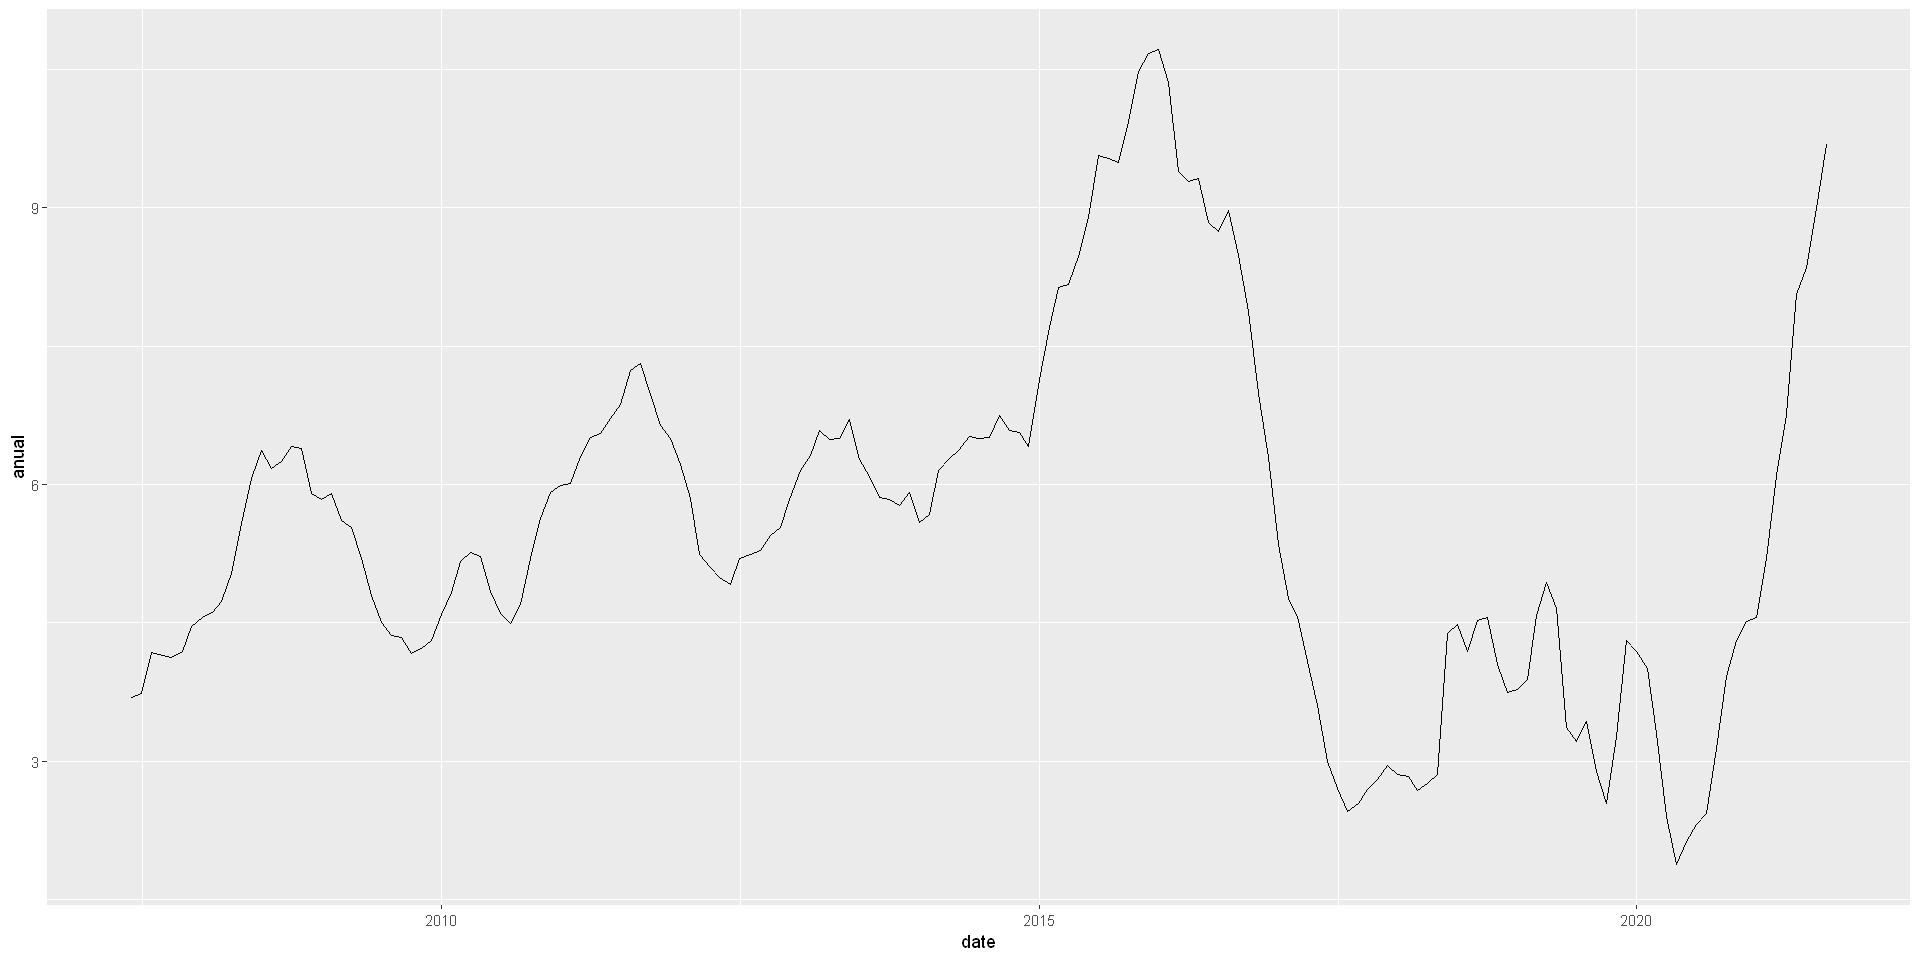

In [38]:
options(repr.plot.width = 16, repr.plot.height = 8)
ipca_janela %>%
    ggplot(aes(x=date, y=anual))+
    geom_line()